In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("C:/Users/Ina Lee/PythonStudy/2019_study/Machine_Learning_AZ_Template_Folder/Machine Learning A-Z Template Folder/Part 1 - Data Preprocessing/Data.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


데이터셋에서 종속/독립변수를 구분지어 주어야 함. purchased 는 종속변수, 나머지는 독립변수 

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

NaN 값은 평균값으로 채워 넣어줄 것

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan)
X[:,1:3] = imputer.fit_transform(X[:,1:3])

missing data 전처리는 완료, 남아있는 데이터 가운데 숫자가 아닌 데이터를 숫자화 시켜야함 -> encoidng
X,y에 있는 칼럼들을 인코딩

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
x_encoder = ColumnTransformer([('iv_encoder',OneHotEncoder(sparse=False),[0]),],remainder='passthrough')
X = x_encoder.fit_transform(X)

### 각 국가는 숫자로 차등을 두어서 구분하는 것이 아니라 그냥 속하는지 아닌지 정도만 판단하는 것이기 떄문에 one-hot encoder

In [18]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [22]:
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

## y는 one-hot encoder 해줄필요 없음..

In [20]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object)

### Feature Scaling
feature 간의 스케일을 균등하게 해주는 작업
-> 비교하고자 하는 절대적 수치가, 비교하기에 힘들수도 있기때문에 표준화 및 정규화가 필요함

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) ### 이미 fit이 완료된 상태이므로 fit_transform 해줄필요X 

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

dummy variable 에도 feature scaling 을 적용해야할까? 
- 적용시켜버리면 해석력이 낮아짐 / 그러나 이점으로는 모델의 정확도가 높아짐. 


target vector(y) - 어떨때 feature scaling을 해주어야 하는지? 

- 분류 모델에선 feature scaling 필요 X 하지만 연속형자료(regression)에 있어서는 feature scaling이 필요

----------------------------------------------------------------------------------------------------

### Simple Linear Regression

#### y절편값 : x가 없을때 상주하고 있는 값

선형회귀의 목표
- obesrvation들을 가장 잘 설명할 수 있는 x-y간의 관계성
- best-fitting line을 찾자.새로운 input x에 대한 y를 예측

### Ordinary Least Square
min(SUM(Y-Y')) : 모델과 실제 데이터와의 차이를 더한 후 그 차이가 최소인 모델을 찾는 방법

In [50]:
# %load data_preprocessing_template
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Users/Ina Lee/PythonStudy/2019_study/Machine_Learning_AZ_Template_Folder/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/Simple_Linear_Regression/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regressor.coef_

array([9345.94244312])

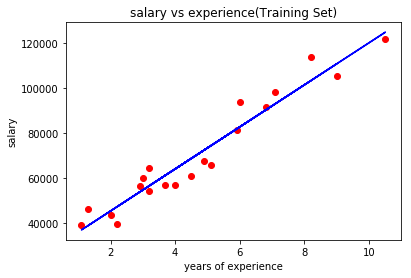

In [52]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('salary vs experience(Training Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

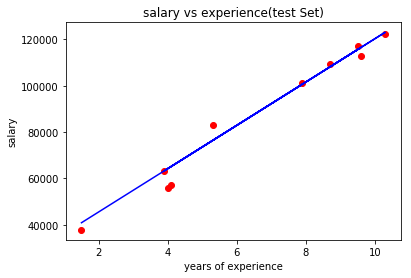

In [57]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.title('salary vs experience(test Set)')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,regressor.predict(X))
mse

31577311.619426798

In [62]:
### 세타 값은 계속해서 바뀌므로. parameter 를 의미! (계속 최적화 과정을 거치면서 값이 바뀌는 것이 parameter)

딥러닝 전제조건은 데이터가 비선형이여야 함! (딥러닝은 최적화 해나가는 과정이므로)